# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Validation
The dataset contains 15000 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

- week: from 1 to 6 without missing values, same as the description. No cleaning is needed.
- sales_method: 5 different categories without missing values, there are 2 lowercase categories that must be uppercase to get 3 categories
- customer_id: same as the description. No cleaning is needed.
- nb_sold: 4 categories without missing values, same as the description. No cleaning is needed.
- revenue: numeric values with 1074 missing values
- years_as_customer: numeric values without missing values, same as the description. No cleaning is needed.
- nb_site_visits: numeric values without missing values, same as the description. No cleaning is needed.
- state: 50 different states without missing values, same as the description. No cleaning is needed.
- After the data validation, the dataset contains 15000 rows and 8 columns without missing values.

In [3]:
df=pd.read_csv('product_sales.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
df.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In [10]:
df['revenue']=df['revenue'].fillna(df['revenue'].dropna().median())
df=df.replace(to_replace="em + call",
           value="Email + Call")
df=df.replace(to_replace="email",
           value="Email")

# Data Discovery and Visualization
## How many customers were there for each approach?
From the figure below, email is the most common sales method with more than 7000 customers, followed by call (4962) and email and call (2572). Therefore, we can conclude that there is huge room to impove the sales of email and call and call.

In [12]:
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

Text(0.5, 1.0, 'The number of customers for each method')

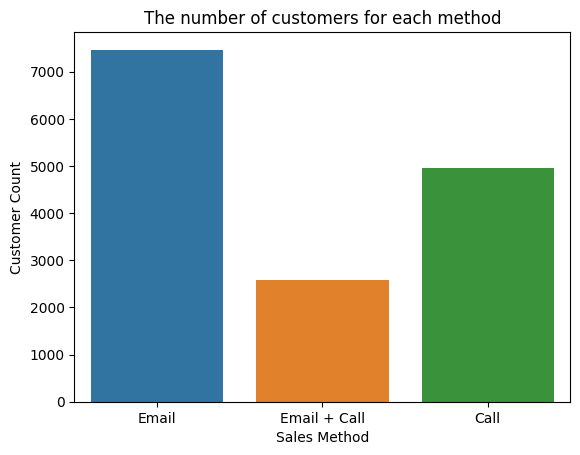

In [14]:
sns.countplot(x=df['sales_method'])
plt.ylabel('Customer Count')
plt.xlabel('Sales Method')
plt.title('The number of customers for each method')

## What does the spread of the revenue look like overall? And for each method?
We also want to compare the revenue last 6 weeks, we should look at how the revenue is distributed. The majority of revenue last 6 weeks is less than 250. The revenue for more than 250 could be considered outliers.

Text(0.5, 1.0, 'The distribution of revenue')

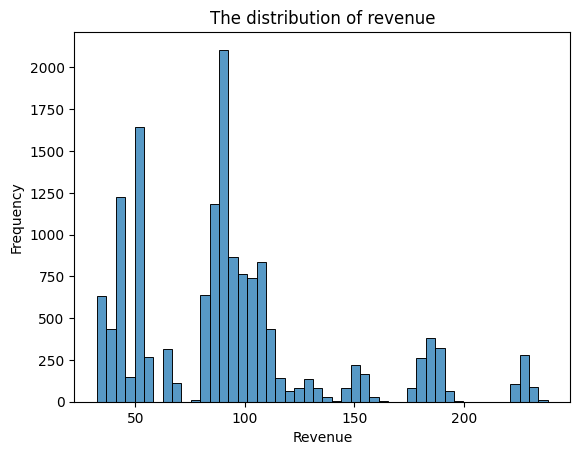

In [13]:
sns.histplot(x=df['revenue'])
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.title('The distribution of revenue')

From the multiple boxplots below, we can see the revenue range in email and call is more significant than other sales methods. The majority of the revenue of email and call range from 150 to 180, which is higher than email, call. 

Email, by contrast, which has the most customers but the sales range is from 80 to 110 and the call method has less revenue, from 40 to 60

Text(0.5, 1.0, 'The distribution of revenue by sales method')

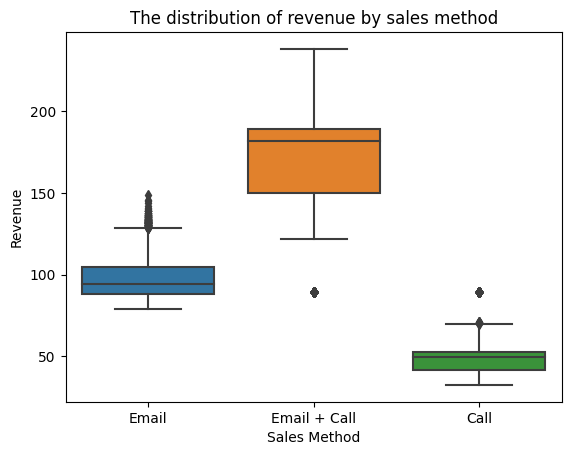

In [15]:
sns.boxplot(data=df,x='sales_method', y ='revenue')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('The distribution of revenue by sales method')

## Was there any difference in revenue over time for each of the methods?
From the bar chart below, we can see the sales of all methods has increased from week 1 to week 6. However, the revenue of email and call after 6 weeks is more than 200, which is significantly higher than email, call. Therefore, for people buying a new product line, email and call might be an excellent choice based on this information.

<AxesSubplot: xlabel='week', ylabel='revenue'>

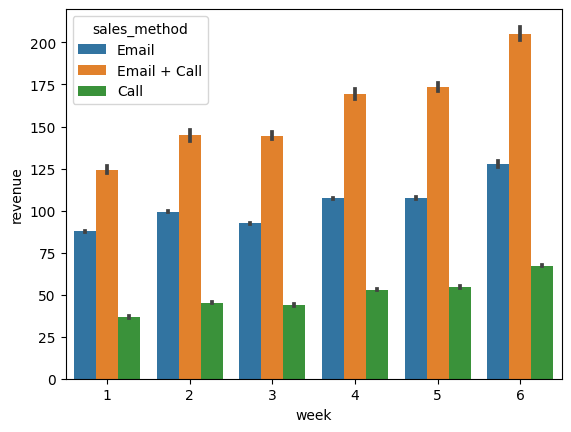

In [14]:
sns.barplot(data=df,x='week', y ='revenue', hue='sales_method')

# Business Metrics
Since our goal is selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two. I would recommend we use the revenue of email and call in total number of sales methods sold last 6 weeks as our metric.

Based on our last 6 week data, 17% of the new product line sold is email and call. Therefore, if this number is increasing in the future, it indicates very good sign to achieve our goal.

# Recommendation
For the following weeks, I would recommend we can focus on the following steps:

- Using key metrics to monitor whether there is a strong sign to see the sales will increase.
- To implement the campaign as soon as possible, we should smartly promote the email and call in the market:
Targetting in other states
Less expensive email, call products
- Stay on top of the current email and call line markets so that the newest information can be integrated in the campaign.
- Data Collection for in-depth analysis
Improve data quality - how the number of customers affect the sales?
New related data - Comparing the revenue of different sales methods in the next 6 months